# Multi-class image classification
Simple example to classify images using tensorflow

## Import Data

In [1]:
# Import helper functions
def split_dir_to_train_test_val(directory = "images/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

In [2]:
# Split images dir to train, test and validation
split_dir_to_train_test_val(directory="images/",
                            train_size=0.8,
                            test_size=0.1,
                            val_size=0.1)

Folder Infestation elevée. Train data copied. 29 files
Folder Infestation elevée. Test data copied. 4 files
Folder Infestation elevée. Validation data copied. 4 files
Folder Infestation faible. Train data copied. 78 files
Folder Infestation faible. Test data copied. 10 files
Folder Infestation faible. Validation data copied. 10 files
Folder Infestation moyenne. Train data copied. 60 files
Folder Infestation moyenne. Test data copied. 7 files
Folder Infestation moyenne. Validation data copied. 8 files


## Explore and visualize the data

In [12]:
# Using helper function get class names
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['Infestation elevée', 'Infestation faible', 'Infestation moyenne'],
      dtype='<U19')

In [5]:
len(class_names)

3

Image shape: (240, 240, 3)


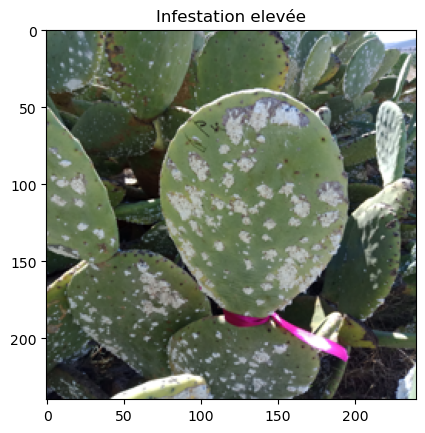

In [10]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import numpy as np

def visualize_random_image(target_dir, target_class, target_size=(240, 240)):
    """
    Visualises random image from exact directory
    """
    image_dir = os.path.join(target_dir, target_class)
    random_image = random.choice(os.listdir(image_dir))
    
    img_path = os.path.join(image_dir, random_image)
    img = Image.open(img_path)
    img = img.resize(target_size)  
    img_array = np.array(img)
    
    print("Image shape:", img_array.shape)
    
    plt.imshow(img_array)
    plt.title(target_class)
    plt.show()

visualize_random_image("files/test/", "Infestation elevée")


## Create datasets from directories

In [21]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 213 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


In [12]:
import numpy as np

# Get a batch of images from the test_data generator
test_images, _ = next(test_data)

# Get the shape of a random image from the batch
random_image_shape = test_images[0].shape

print("Shape of a random image in the test folder:", random_image_shape)


Shape of a random image in the test folder: (240, 240, 3)


## Create and fit the model

In [13]:
# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(3, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

2024-03-29 21:19:22.195007: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-29 21:19:22.195041: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-29 21:19:22.195052: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-29 21:19:22.195569: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-29 21:19:22.196010: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
# Fit the model
history = model.fit(train_data,
                    batch_size=32,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/10


2024-03-29 21:19:26.292526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 3.8557 - accuracy: 0.2629

2024-03-29 21:19:37.727502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 14s 2s/step - loss: 3.8557 - accuracy: 0.2629 - val_loss: 1.5498 - val_accuracy: 0.3556
Epoch 2/10
7/7 [==============================] - 12s 2s/step - loss: 1.6507 - accuracy: 0.4883 - val_loss: 1.1511 - val_accuracy: 0.5111
Epoch 3/10
7/7 [==============================] - 12s 2s/step - loss: 1.0317 - accuracy: 0.3803 - val_loss: 0.9621 - val_accuracy: 0.6222
Epoch 4/10
7/7 [==============================] - 12s 2s/step - loss: 0.9200 - accuracy: 0.6103 - val_loss: 0.8569 - val_accuracy: 0.6889
Epoch 5/10
7/7 [==============================] - 12s 2s/step - loss: 0.8522 - accuracy: 0.6479 - val_loss: 0.8073 - val_accuracy: 0.6444
Epoch 6/10
7/7 [==============================] - 12s 2s/step - loss: 0.7210 - accuracy: 0.7934 - val_loss: 0.6650 - val_accuracy: 0.8667
Epoch 7/10
7/7 [==============================] - 12s 2s/step - loss: 0.5812 - accuracy: 0.8920 - val_loss: 0.5518 - val_accuracy: 0.8667
Epoch 8/10
7/7 [=============================

## Evaluate model

In [ ]:
model.evaluate(test_data)

<Axes: >

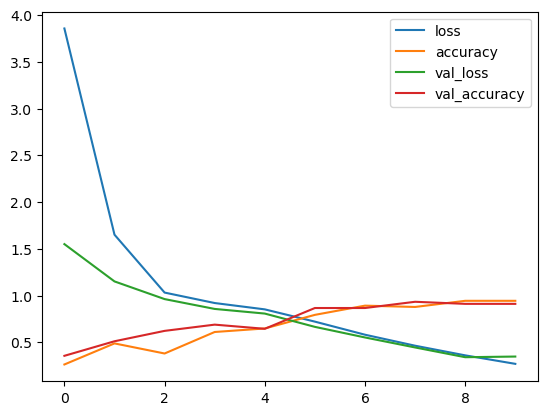

In [17]:
import pandas as pd

pd.DataFrame(history.history).plot()

## Make a prediction

In [18]:
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)
  # Compile image
  img = tf.image.decode_image(img)
  # Resize image
  img = tf.image.resize(img, [size, size])
  # Scale the tensor
  img = img / 255
  img_array = img.numpy()
  # Print the image
  plt.imshow(img_array)
  plt.title("Resized Image")
  plt.axis('off')  # Turn off axis
  plt.show()
  return img

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

def load_and_resize_image(filename, size):
    # Load image
    img = tf.io.read_file(filename)
    # Compile image
    img = tf.image.decode_image(img)
    # Resize image
    img = tf.image.resize(img, [size, size])
    # Scale the tensor
    img = img / 255
    img_array = img.numpy()
    return img_array

def predict_and_display_images_in_folder(folder_path, size, model, class_names):
    for file_name in os.listdir(folder_path):
        if file_name.endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(folder_path, file_name)
            img = load_and_resize_image(file_path, size)
            pred = model.predict(tf.expand_dims(img, axis=0))
            predicted_class = class_names[pred[0].argmax()]

            # Display image with predicted class
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            print(f"Nom de l'image: {file_name}")
            print(f'Classe predite: {predicted_class}')

# Example usage:
folder_path = "test"
image_size = 240

predict_and_display_images_in_folder(folder_path, image_size, model, class_names)


1/1 [==============================] - 0s 11ms/step


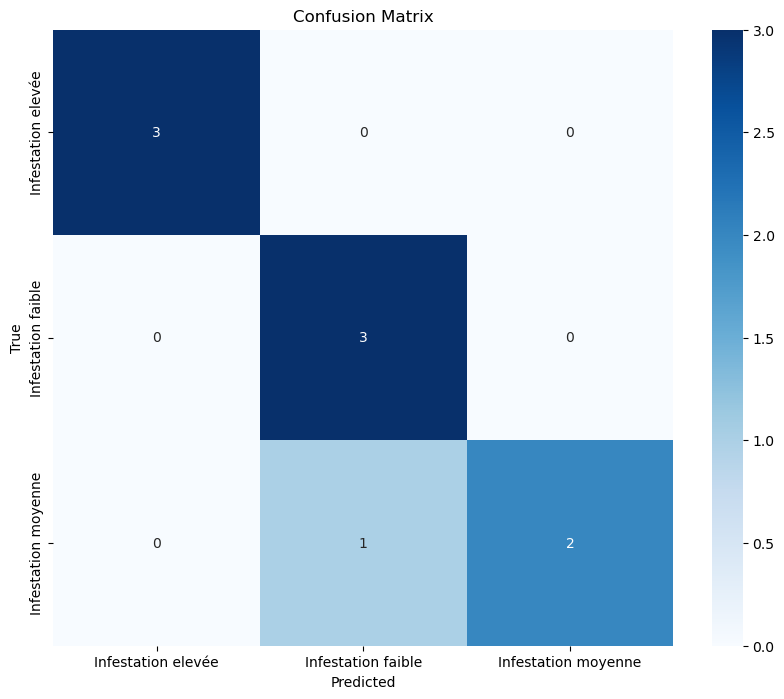

Accuracy: 0.8888888888888888
Precision: 0.9166666666666666
Recall: 0.8888888888888888
F1 Score: 0.8857142857142857


In [34]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

def predict_classes_in_folder(folder_path, size, model, class_names):
    true_labels = []
    predicted_labels = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(folder_path, file_name)
            img = load_and_resize_image(file_path, size)
            pred = model.predict(tf.expand_dims(img, axis=0))
            predicted_class = class_names[pred[0].argmax()]

            # Extract true label from filename
            true_label = file_name.split('_')[0]  # Assuming the true label is before the first underscore
            true_labels.append(true_label)
            predicted_labels.append(predicted_class)

    return true_labels, predicted_labels

def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def print_metrics(true_labels, predicted_labels, class_names):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted', labels=np.unique(predicted_labels))
    recall = recall_score(true_labels, predicted_labels, average='weighted', labels=np.unique(predicted_labels))
    f1 = f1_score(true_labels, predicted_labels, average='weighted', labels=np.unique(predicted_labels))

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

# Example usage:
folder_path = "test"
image_size = 240

true_labels, predicted_labels = predict_classes_in_folder(folder_path, image_size, model, class_names)
plot_confusion_matrix(true_labels, predicted_labels, class_names)
print_metrics(true_labels, predicted_labels, class_names)


In [68]:
model.save('Classification 3 phases.h5')

/Users/yben409/Desktop/work/A.E/Images avec phases d'infection/tensorflow_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
import tensorflow as tf
import cv2
classifier_yes_no = tf.keras.models.load_model('imageclassifier.h5')
classifier_infection_phases = tf.keras.models.load_model('Classification 3 phases.h5')

In [10]:
classifier_yes_no.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [33]:
img = cv2.imread(img_path)
type(img)

numpy.ndarray

In [13]:
class_names = ['Infestation elevée', 'Infestation faible', 'Infestation moyenne']

def classify(img_path,class_names,classifier_yes_no,classifier_infection_phases):
    import cv2
    import matplotlib.pyplot as plt
    import numpy as np
    from PIL import Image
    img = cv2.imread(img_path)
    resize = tf.image.resize(img, (256,256))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    yhat = classifier_yes_no.predict(np.expand_dims(resize/255, 0))
    print(yhat)
    if yhat > 0.7: 
        return 'Le cactus est en bonne santé'
    else:
        img = Image.open(img_path)
        img = img.resize((240, 240))  
        img_array = np.array(img)
        pred = classifier_infection_phases.predict(tf.expand_dims(img, axis=0))
        predicted_class = class_names[pred[0].argmax()]
        if predicted_class == 'Infestation faible':
            return "Cactus malade : Infectation faible"
        elif predicted_class == 'Infestation moyenne':
            return "Cactus malade : Infectation moyenne"
        elif predicted_class == 'Infestation elevée':
            return "Cactus malade : Infectation elevée"

1/1 [==============================] - 0s 11ms/step
[[0.91152483]]


'Le cactus est en bonne santé'

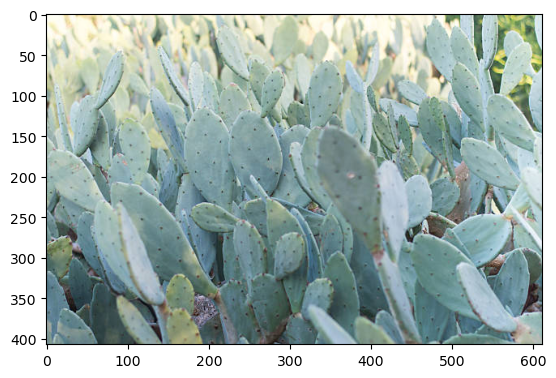

In [14]:
img_path = "Cladodes photos field/cactuses-of-a-light-blue-color-in-a-public-park.jpg"
classify(img_path,class_names,classifier_yes_no,classifier_infection_phases)

1/1 [==============================] - 0s 12ms/step
[[1.0484146e-06]]
1/1 [==============================] - 0s 45ms/step


2024-05-07 23:08:03.630964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


'Cactus malade : Infectation faible'

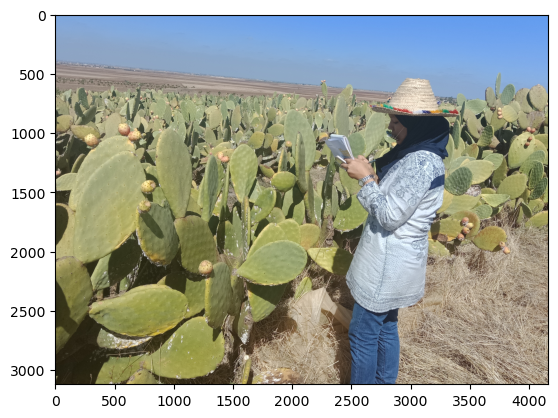

In [15]:
img_path = "IMG20181015125607.jpg"
classify(img_path,class_names,classifier_yes_no,classifier_infection_phases)

1/1 [==============================] - 0s 10ms/step
[[0.7286965]]


'Le cactus est en bonne santé'

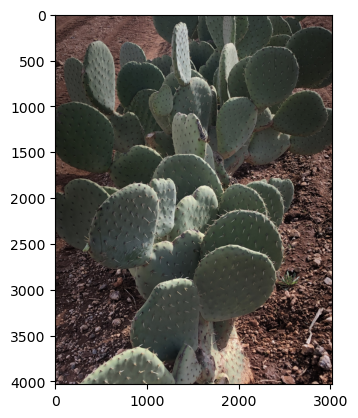

In [16]:
img_path = "test_-_.jpg"
classify(img_path,class_names,classifier_yes_no,classifier_infection_phases)

1/1 [==============================] - 0s 11ms/step


'Cactus malade : Infectation elevée'

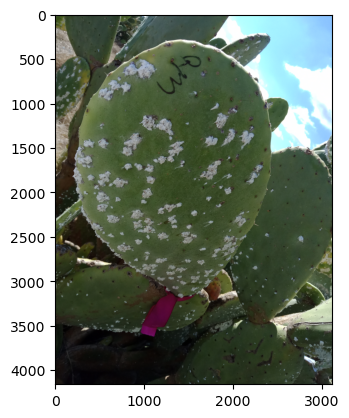

1/1 [==============================] - 0s 10ms/step


In [47]:
img_path = "IMG20181023132811.jpg"
classify(img_path,class_names,classifier_yes_no,classifier_infection_phases)

In [73]:
os.getcwd()

"/Users/yben409/Desktop/work/A.E/Images avec phases d'infection"

1/1 [==============================] - 0s 34ms/step


2024-05-07 15:47:12.414103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-07 15:47:12.480928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


'Prédiction : Cactus malade - Infectation elevée'

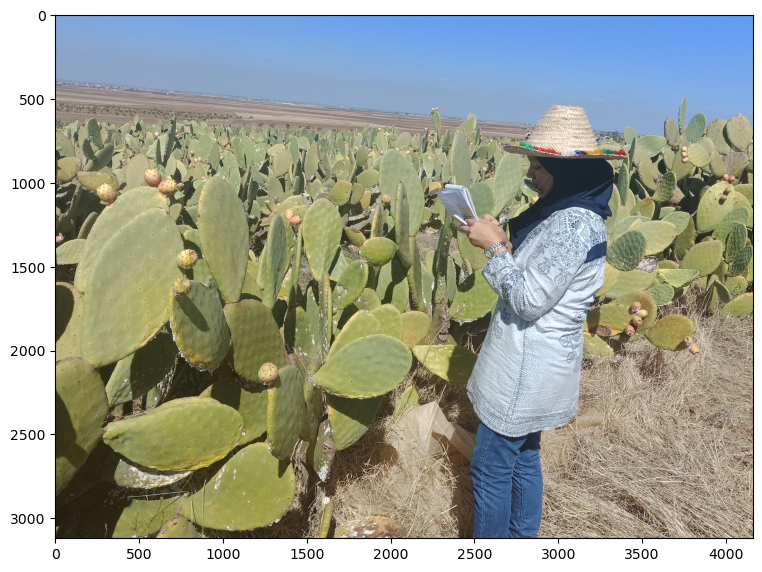

In [3]:
import tensorflow as tf

classifier_yes_no = tf.keras.models.load_model('imageclassifier.h5')
classifier_infection_phases = tf.keras.models.load_model('Classification 3 phases.h5')

class_names = ['Infestation elevée', 'Infestation faible', 'Infestation moyenne']

def classify_for_gradio(img):
    import cv2
    import matplotlib.pyplot as plt
    import numpy as np
    from PIL import Image
    resize = tf.image.resize(img, (256,256))
    plt.figure(figsize=(9, 9))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    yhat = classifier_yes_no.predict(np.expand_dims(resize/255, 0))
    if yhat > 0.7: 
        return 'Prédiction : Le cactus est en bonne santé'
    else:
        img = Image.open(img_path)
        img = img.resize((240, 240))  
        pred = classifier_infection_phases.predict(tf.expand_dims(img, axis=0))
        predicted_class = class_names[pred[0].argmax()]
        if predicted_class == 'Infestation faible':
            return "Prédiction : Cactus malade - Infectation faible"
        elif predicted_class == 'Infestation moyenne':
            return "Prédiction : Cactus malade - Infectation moyenne"
        elif predicted_class == 'Infestation elevée':
            return "Prédiction : Cactus malade - Infectation elevée"

img_path = "test/Infestation faible_4.jpg"
import cv2
img = cv2.imread(img_path)
classify_for_gradio(img)

In [1]:
import streamlit as st

def main():
    st.title("Simple Streamlit App")
    
    # Text input
    user_input = st.text_input("Enter your name", "John Doe")
    st.write("Hello,", user_input)
    
    # Slider input
    age = st.slider("Select your age", 0, 100, 25)
    st.write("Your age is:", age)
    
    # Checkbox input
    agree = st.checkbox("I agree to the terms and conditions")
    if agree:
        st.write("You agreed!")
    else:
        st.write("Please agree to proceed.")
    
if __name__ == "__main__":
    main()


2024-05-07 03:11:19.118 
  command:

    streamlit run /Users/yben409/Desktop/work/A.E/Images avec phases d'infection/tensorflow_env/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-05-07 03:11:19.119 Session state does not function when running a script without `streamlit run`


In [7]:
import tensorflow as tf

# Load the model configurations
config_classifier_yes_no = tf.keras.models.load_model('imageclassifier.h5').get_config()
config_classifier_infection_phases = tf.keras.models.load_model('Classification 3 phases.h5').get_config()

# Print the configurations
print("Config for classifier_yes_no:")
print(config_classifier_yes_no)
print("\nConfig for classifier_infection_phases:")
print(config_classifier_infection_phases)

Config for classifier_yes_no:
{'name': 'sequential', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 256, 256, 3), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 256, 256, 3), 'filters': 16, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_cons

In [8]:
tf.__version__

'2.13.0'